<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Python-Machine-Learning-notebooks/blob/main/Model_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Validation on RandomForestRegression

Model Validation

It consists in ensuring the model performs as expected on onseen data.

Testing model performance on hold-out datasets

**Selecting the best model, parameters and accuracy metrics.**

The objective is to end up with the best performing model, achieving the best accuracy on new data. We need the lowest testing error as possible.





In [ ]:
import pandas as pd

df = pd.read_csv('https://assets.datacamp.com/production/repositories/3981/datasets/bdbcfeff5aff20449bad8a8f1e66ae0169b9a26d/candy-data.csv')

print(df.shape)
df.head()

(85, 13)


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
y = df.winpercent

X = df.drop(['competitorname','winpercent'], axis= 1)

print(y.head())
print(X.head())

0    66.971725
1    67.602936
2    32.261086
3    46.116505
4    52.341465
Name: winpercent, dtype: float64
   chocolate  fruity  caramel  ...  pluribus  sugarpercent  pricepercent
0          1       0        1  ...         0         0.732         0.860
1          1       0        0  ...         0         0.604         0.511
2          0       0        0  ...         0         0.011         0.116
3          0       0        0  ...         0         0.011         0.511
4          0       1        0  ...         0         0.906         0.511

[5 rows x 11 columns]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=42)

X_train.shape

(51, 11)

Model's tend to have higher accuracy on observations they have seen before. In the candy dataset, predicting the popularity of Skittles will likely have higher accuracy than predicting the popularity of Andes Mints; Skittles is in the dataset, and Andes Mints is not.

## Random Forest Mean Absolute Error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

model = RandomForestRegressor(n_estimators=50)

# The model is fit using X_train and y_train
model.fit(X_train, y_train)

# Create vectors of predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# mae(y_true, y_pred)
# Train/Test Errors
train_error = mae(y_true=y_train, y_pred=train_predictions)
test_error = mae(y_true=y_test, y_pred=test_predictions)

# Print the accuracy for seen and unseen data
print("Model error on seen data: {0:.2f}.".format(train_error))
print("Model error on unseen data: {0:.2f}.".format(test_error))

Model error on seen data: 3.68.
Model error on unseen data: 9.95.


## RandomForest feature importances

The most import parameters that make a huge impact in the model: 

1- n_estimators = Number of trees in the forest

2- max_depth = maximum depth of the trees (or how many time we can split the data)





In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50,max_depth=6,random_state=1111)

# you can update parameters after the model has been instantiated

rf.fit(X_train, y_train)

# Print how important each column is to the model
for i, item in enumerate(rf.feature_importances_):
    # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

chocolate: 0.34
fruity: 0.05
caramel: 0.01
peanutyalmondy: 0.07
nougat: 0.02
crispedricewafer: 0.01
hard: 0.01
bar: 0.07
pluribus: 0.02
sugarpercent: 0.17
pricepercent: 0.23


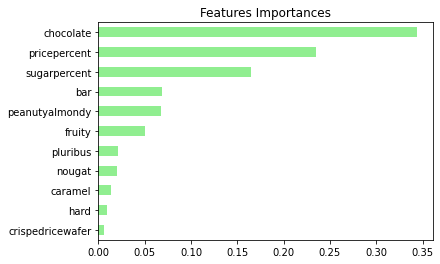

In [ ]:
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

# RandomForestClassifier

In [ ]:
import pandas as pd
df = pd.read_csv('https://assets.datacamp.com/production/repositories/3981/datasets/e6ee6604b9eed121a015a993bfb225ddf656cf81/tic-tac-toe.csv')

print(df.shape)
df.head()

(958, 10)


,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [ ]:
import numpy as np

df = df.replace('x',1).replace('o',0).replace('b',0)

df.head()

,Top-Left,Top-Middle,Top-Right,Middle-Left,Middle-Middle,Middle-Right,Bottom-Left,Bottom-Middle,Bottom-Right,Class
0,1,1,1,1,0,0,1,0,0,positive
1,1,1,1,1,0,0,0,1,0,positive
2,1,1,1,1,0,0,0,0,1,positive
3,1,1,1,1,0,0,0,0,0,positive
4,1,1,1,1,0,0,0,0,0,positive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = df.Class
X = df.drop('Class',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

rfc = RandomForestClassifier(n_estimators=50, max_depth=6)

# Fit the rfc model. 
rfc.fit(X_train, y_train)

# Create arrays of predictions
classification_predictions = rfc.predict(X_test)
probability_predictions = rfc.predict_proba(X_test)

# Print out count of binary predictions
print(pd.Series(classification_predictions).value_counts())

# Print the first value from probability_predictions
print('The first predicted probabilities are: {}'.format(probability_predictions[0]))

rfc.score(X_test, y_test)

positive    137
negative     55
dtype: int64
The first predicted probabilities are: [0.45576679 0.54423321]


0.9375

# Training, validation, and testing datasets

test data = unseen data = new data = holdout data

universal ratio: 80/20

90/10 if we have little data
70/30 when the model is computationally expensive

There could be another test dataset that is called validation set. After train_test_split X and y into train and testing, we split testing into validation and testing dataset.


In [ ]:
# Double training and testing

# Create temporary training and final testing datasets
X_temp, X_test, y_temp, y_test  =\
    train_test_split(X, y, test_size=0.20, random_state=1111)

# Create the final training and validation datasets
X_train, X_val, y_train, y_val  =\
    train_test_split(X_temp, y_temp, test_size=0.25, random_state=1111)


Why use holdout sets
It is important to understand when you would use three datasets (training, validation, and testing) instead of two (training and testing). There is no point in creating an additional dataset split if you are not going to use it.

When should you consider using training, validation, and testing datasets?

**Anytime we are evaluating model performance repeatedly we need to create training, validation, and testing datasets.**

# Accuracy metrics for regression models

The simples metric used when validating models for regression models

Continuous predicted values.

We can use:

1- Mean Absolute error. The simplest. Treats all points equally. Communicating modeling results can be difficult. However, most clients understand that on average, a predictive model was off by some number. This makes explaining the mean absolute error easy.

2- Mean Squared error. We square the difference term. **Most widely used regression metric**. Outliers (highest/lower values) have more impact on the model performance.  If you run any additional models, you will try to beat an MSE of the first calculation, which is the average squared error of using your first model. Although the MSE is not as interpretable as the MAE, it will help us select a model that has fewer 'large' errors.



# Accuracy metrics for classification models

In these models we are predicting what category an observation falls into.

Many accuracy metric available:

1- **Precision**

2- **Recall (also called sensitivity)**

3- **Accuracy**

4- Specificity

5- F1-Score and its variations

We calculate this metrics from the confusion matrix

Specially if there is a binary outcome confusion matrix is one of the first things I should review.

Binary outcome: confusion matrix is a 2x2 matrix


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Create predictions
test_predictions = rfc.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)

# Print the true positives (actual 1s that were predicted 1s)
print("The number of true positives is: {}".format(cm[1, 1]))

[[ 50  10]
 [  0 132]]
The number of true positives is: 132


## Accuracy 

Easiest metric to understand and represents the overall ability of your model to correctly predict the correct classification.

 (TNegatives + TPositives) / total number of observations = (e.g. 0.85)

 In our case:

 (57+125) / (57+125+10) = 0.9479

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


accuracy_score(y_test, classification_predictions)

0.5885416666666666

## Precision

When the predicted value is 1, what percentage your model predicted was really 1 and what percentage wasn't

The number of true positives out of all predicted positive values.
This value is representative when having classes that are uneven distributed, like Spam 1% not Spam 99%, if a model predicts only not spam Accuracy will be 99%, but precision will be 0%.

TP / (TP+FP) 

In our case:

125 / 135 = 0.926

In [ ]:
from sklearn.metrics import precision_score

# Create precision or recall score based on the metric you imported
score = precision_score(y_test, test_predictions, pos_label="positive")

# Print the final result
print("The precision value is {0:.2f}".format(score))

The precision value is 0.93


## Recall

When the actual value is 1, what percentage your model predicted 1.

Recall is used when we can't afford to loose any positive values.

TP = (TP+FN)

In our case:

125 / 125+0 = 1 


In [ ]:
from sklearn.metrics import recall_score

# Create precision or recall score based on the metric you imported
score = recall_score(y_test, test_predictions, pos_label="positive")

# Print the final result
print("The precision value is {0:.2f}".format(score))

The precision value is 1.00


# The bias-variance tradeoff



## Variance

Variance: If model has high variance it follows training data to closely. That is overfit the model. In this case we have low training error but high test error.

Overfitting occur when the model starts to attach meaning to the noise in the training data.

Overfitting is easy to identify because we have lower training error than testing error.



## Bias

This terms applies when the model fails to find the actual relationship between data and the response. High training error and high testing error. Occurs when models underfit.

The model doesn't find the underlying pattern available in the data.




## The bias-variance tradeoff



# Cross-Validation

If our models are not generalizing well or if we have limited data, we should be careful using a single training/validation split. You should cross-validation.



In [ ]:
import pandas as pd

df = pd.read_csv('https://assets.datacamp.com/production/repositories/3981/datasets/bdbcfeff5aff20449bad8a8f1e66ae0169b9a26d/candy-data.csv')

y = df.winpercent

X = df.drop(['competitorname','winpercent'], axis= 1)

print(y.head())
print(X.head())


0    66.971725
1    67.602936
2    32.261086
3    46.116505
4    52.341465
Name: winpercent, dtype: float64
   chocolate  fruity  caramel  ...  pluribus  sugarpercent  pricepercent
0          1       0        1  ...         0         0.732         0.860
1          1       0        0  ...         0         0.604         0.511
2          0       0        0  ...         0         0.011         0.116
3          0       0        0  ...         0         0.011         0.511
4          0       1        0  ...         0         0.906         0.511

[5 rows x 11 columns]


In [ ]:
# Instruction 1: Load the cross-validation method
from sklearn.model_selection import cross_val_score

# Instruction 2: Load the random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Instruction 3: Load the mean squared error method
# Instruction 4: Load the function for creating a scorer
from sklearn.metrics import mean_squared_error_error, make_scorer

In [ ]:
rfc = RandomForestRegressor(n_estimators=25, random_state=1111)

mse = make_scorer(mean_squared_error)

# Set up cross_val_score
cv = cross_val_score(estimator=rfc,
                     X=X,
                     y=y,
                     cv=10,
                     scoring=make_scorer(mean_squared_error))

# Print the mean error
print(cv.mean())

155.55845080026586


# Leave one out cross-validation

what is LOOCV? making n cross validation for n samples. So you leave one one sample per cross-validation.

**When to use LOOCV?**

When the amount of training is limited

You want the absolute best error estimate for new data.

**Be cautious when: **

Computational resources are limited

You have a lot of data.

You have a lot of parameters to test.

In this candy data set that we only have few observations, LOOCV is a good technique to implement.

In [ ]:
n_samples = X.shape[0]

rfr = RandomForestRegressor(n_estimators=25, random_state=1111)

mae = make_scorer(mean_absolute_error)

# Set up cross_val_score
scores = cross_val_score(estimator=rfc,
                     X=X,
                     y=y,
                     cv=n_samples,
                     scoring=mae)

# Print the mean and standard deviation
print("The mean of the errors is: %s." % np.mean(scores))
print("The standard deviation of the errors is: %s." % np.std(scores))

The mean of the errors is: 9.362301251545098.
The standard deviation of the errors is: 7.399032885517822.


# Hyperparameter Tuning

Parameters are: Learned or estimated from the data, the result of fitting a model. Not manually set. e.g. in Linear Regression the coeficients and the intercepto of the model. 

Hyperparameters are set before training occurs. 

For tuning you first need to specify the hyperparameters to tune and then the range of each.

if you write .get_params() method on a DecisionTree you'll get 16 hyperparameters. in practice only a handful of these will be tuned ar the same time.






In [ ]:
# Review the parameters of rfr
print(rfr.get_params())

# Maximum Depth
max_depth = [4, 8, 12]

# Minimum samples for a split
min_samples_split = [2, 5, 10]

# Max features 
max_features = [4, 6, 8, 10]

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}


# Combine model validation with tuning






## GridSearchCV

Tests every possible combination

Every additional hyperparameter increase training time exponentially


GridSearching only possible with limited hyperparameters and ranges.

Two alternatives to GridSearching:

1- Random Searching

2- Bayesian Optimization

## RandomizedGridCV on RandomForestRegressor

This method will randomly select hyperparameters for each model run based on the used-defined hyperparameter space.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1111)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Finish the dictionary by adding the max_depth parameter
param_dist = {"max_depth": [2, 4, 6, 8],
              "max_features": [2, 4, 6, 8, 10],
              "min_samples_split": [2, 4, 8, 16]}

# Create a random forest regression model
rfr = RandomForestRegressor(n_estimators=10, random_state=1111)

# Create a scorer to use (use the mean squared error)
scorer = make_scorer(mean_squared_error)

# Build a random search using param_dist, rfr, and scorer
rs = RandomizedSearchCV(
        estimator=rfr,
        param_distributions=param_dist,
        n_iter=20, # n_iter is the number of iterations
        cv=5,
        scoring=scorer)

rs.fit(X_train,y_train)



RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                  

In [ ]:
# Print best parameters: these parameters do produce the best testing MSE.
print(rs.best_params_)

# Print the best testing MSE
print(rs.best_score_)


print(rs.best_estimator_.get_params())

y_pred = rs.best_estimator_.predict(X_test)

# Compute rmse_test
mse_test = mean_squared_error(y_test, y_pred)

# Print mse_test
print('Test MSE of best model: {:.3f}'.format(mse_test)) 

{'min_samples_split': 16, 'max_features': 2, 'max_depth': 6}
151.52443725259224
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 6, 'max_features': 2, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1111, 'verbose': 0, 'warm_start': False}
Test MSE of best model: 111.892


## RandomizedGridCV on RandomForestClassifier

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://assets.datacamp.com/production/repositories/3981/datasets/e6ee6604b9eed121a015a993bfb225ddf656cf81/tic-tac-toe.csv')

print(df.shape)

df = df.replace('x',1).replace('o',0).replace('b',0)

y = df.Class
X = df.drop('Class',axis=1)


(958, 10)


In [ ]:
y = y.apply(lambda row: 1 if row == 'positive' else 0)

In [ ]:
# We create a RandomForestClassifier focusing on model precision.
# That is: When the predicted value is 1, what percentage your model 
# predicted was really 1 and what percentage wasn't

from sklearn.metrics import precision_score, make_scorer
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_dist = {'max_depth': range(2, 12, 2),
 'min_samples_split': range(2, 12, 2),
 'n_estimators': [10, 25, 50]}

# Create a precision scorer
precision = make_scorer(precision_score)

# Finalize the random search
rs = RandomizedSearchCV(
  estimator=rfc, param_distributions=param_dist,
  scoring = precision,
  cv=5, n_iter=10, random_state=1111)

rs.fit(X, y)

# print the mean test scores:
print('The precision metric for each run was: {}.'.format(rs.cv_results_['mean_test_score']))
# print the best model score:
print('The best precision metric for a single model was: {}'.format(rs.best_score_))

The precision metric for each run was: [0.94572763 0.77015239 0.67565701 0.96302298 0.94719551 0.9709777
 0.67927918 0.91235796 0.96056099 0.9765119 ].
The best precision metric for a single model was: 0.9765118959516244
